In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

import numpy as np
import scipy.optimize as op




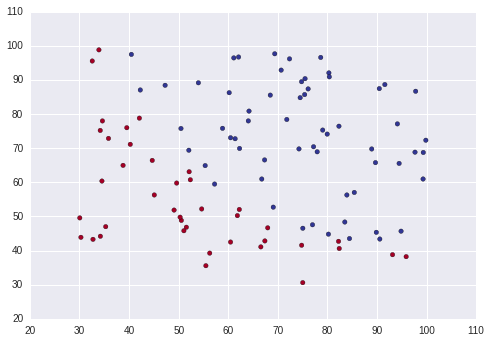

In [16]:
f = open('ex2data1.txt', 'r')
data = np.loadtxt(f, delimiter=',')
X = data[:, [0, 1]]
y = data[:, [2]]


import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c = y, cmap='RdYlBu')

#Add the column of 1's to the training data
ones = np.ones([np.shape(X)[0], 1])
X = np.hstack((ones, X))


The Logistic Regression hypothesis is defined as:  
$$h_\theta(x) = g(\theta^Tx) $$

Where function g is the sigmoid function. The sigmoid function is defined as:
$$ g(z) = \frac{1}{1 + e^{-z}}$$

In [17]:
# Weights array initialised to zeros
weights =  np.zeros([np.shape(X)[1], 1])

import math as math
def hypothesis(x, weights):

    #logistic function
    return (1 / (1 + math.e**( -1 * ( np.dot(x, weights) ) )))


        


$$ Cost(h_\theta(x), y) = \begin{cases}
-\log{(h_\theta(x))},  & \text{if $y$ = 1} \\
-\log{(1-h_\theta(x))}, & \text{if $y$ = 0}
\end{cases} $$

Which can be simplified down to a cost function of:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m [-y^{(i)}\log{(1-h_\theta(x^{(i)})}) - (1-y^{(i)})\log{(1-h_\theta(x^{(i)})} ] $$

In [18]:
# This is often called J(theta) in formal notation
def costFunction(weights, X, y):
    currentCost = 0
    for pointIndex, point in enumerate(X):
        
        # Adding the error to the current sum total
        currentCost +=  (-y[pointIndex] * math.log(hypothesis(point, weights))) - \
        ((1 - y[pointIndex]) * math.log(1 - hypothesis(point, weights)))
        
    averageError = currentCost / np.shape(X)[0]
    
    return averageError

In [19]:
from scipy.optimize import minimize

res = minimize(costFunction, weights, args=(X, y), method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
#Result = op.fmin_bfgs(costFunction, weights, args = (X, y));
weights = res.x


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 204
         Function evaluations: 385


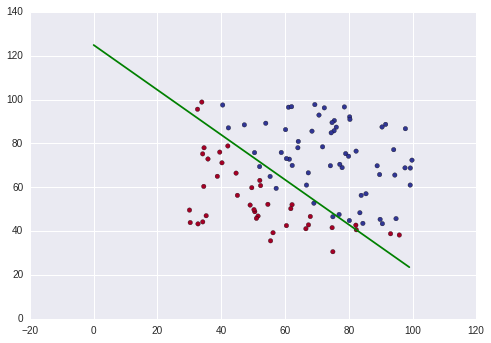

In [20]:
pl.scatter(X[:, 1], X[:, 2], c = y, cmap='RdYlBu')

def g(x):
    return (-weights[0] - (weights[1] * x) ) / weights[2]

#Draw the line that represents the weight vector.
foundFunctionX = np.arange(100).reshape(100 ,1)

ones = np.ones([100,1])
theX = np.hstack((ones, foundFunctionX))

foundFunctionY = g(theX[:,1])

# The green line is the function found via gradient decent
pl.plot(theX[:, 1], foundFunctionY, "g")


In [21]:
def predict(weights, x):
    if (hypothesis(weights, x) >= 0.5):
        return 1
    else:
        return 0

# Get the predictions from the model on the training test
predictions = np.zeros([0,1])
for x in X:
    predictions = np.append(predictions, predict(weights, x))
    
# Compare the predictions on the training set to the correct labels
correct = 0
for predictionIndex, prediction in enumerate(predictions):
    if (prediction == y[predictionIndex]):
        correct += 1

# Calculate and print the models success rate
correctPercentage = correct / np.shape(X)[0]
print(correctPercentage)
    

0.89
